## Linear Regression Vector Form

In [1]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [2]:
def dot(xi,w):
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + w[j] * xi[j]
        
    return res

In [3]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [4]:
def linear_reg(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [5]:
linear_reg(xi)

12.312

## Matrix-Vector Multiplication (Linear Regression)

In [6]:
import numpy as np

x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x10 = [1,453,11,86]

x = [x1,x2,x10]
X = np.array(x)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [7]:
def Linear_regression():
    return X.dot(w_new)

print("Predictions: ",Linear_regression())

Predictions:  [12.38  13.552 12.312]


## Training Linear Regression Model

In [22]:
x = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86]
]
X = np.array(x)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [23]:
y = [200,150,100,260,250,200,180,120,140] 

In [10]:
# Adding bias columns to above features
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
X = np.array(list(np.column_stack([ones,X]).round(1)))

In [12]:
y = [200,150,100,260,250,200,180,120,140]

In [13]:
# Calculate the Gram Matrix

XTX = X.T.dot(X)

In [14]:
# Calculate the inverse of gram matrix

XTX_inv = np.linalg.inv(XTX)

In [15]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [16]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 3.06479324e+02, -2.79656135e-01, -1.77278173e+00, -3.43839455e-02])

In [17]:
# Separating Bias terms and weights

w0 = w[0]
w = w[1:]

print("Bias Term: ",w0)
print("Weights: ", w)

Bias Term:  306.4793240056602
Weights:  [-0.27965614 -1.77278173 -0.03438395]


In [15]:
### Creating the function

def train_Linear_reg(X,y):
    ones = np.ones(X.shape[0])
    X = np.array(list(np.column_stack([ones,X]).round(1)))
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv).round(1)
    weights_with_Bias = XTX_inv.dot(X.T).dot(y)
    return weights_with_Bias[0], weights_with_Bias[1:]

In [25]:
print(train_Linear_reg(X,y))

(306.4793240056602, array([-0.27965614, -1.77278173, -0.03438395]))


## Baseline model on car Dataset

In [1]:
import pandas as pd

car_df = pd.read_csv("car_data.csv")

In [2]:
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
base = ['Engine HP','Engine Cylinders','highway MPG','city mpg','Popularity']
car_df[base]

,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916
...,...,...,...,...,...
11909,300.0,6.0,23,16,204
11910,300.0,6.0,23,16,204
11911,300.0,6.0,23,16,204
11912,300.0,6.0,23,16,204


In [117]:
X = car_df[base].values

In [118]:
car_df[base].isnull().sum()

Engine HP           69
Engine Cylinders    30
highway MPG          0
city mpg             0
Popularity           0
dtype: int64

In [119]:
car_df[base] = car_df[base].fillna(0)

In [120]:
car_df[base].isnull().sum()

Engine HP           0
Engine Cylinders    0
highway MPG         0
city mpg            0
Popularity          0
dtype: int64

In [121]:
x_train = car_df[base]

In [19]:
y_train = car_df['MSRP']

In [123]:
print(train_Linear_reg(x_train,y_train))

(-108042.51212015367, array([ 3.16066139e+02,  7.18276086e+03,  6.73274866e+02,  8.51494109e+02,
       -3.08349846e+00]))


In [124]:
w0, w = train_Linear_reg(x_train,y_train)

In [125]:
print("Bias:" ,w0)
print("Weights: ",w)

Bias: -108042.51212015367
Weights:  [ 3.16066139e+02  7.18276086e+03  6.73274866e+02  8.51494109e+02
 -3.08349846e+00]


In [126]:
y_pred = w0 + x_train.dot(w)

In [127]:
y_pred = y_pred.round()

In [130]:
y_pred

0        62545.0
1        52829.0
2        53680.0
3        29853.0
4        29853.0
          ...   
11909    58354.0
11910    58354.0
11911    58354.0
11912    58354.0
11913    36697.0
Length: 11914, dtype: float64

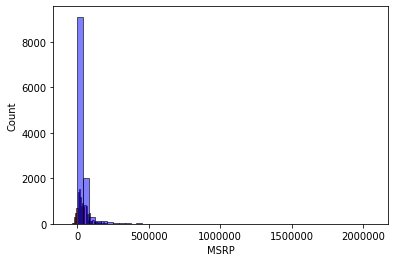

In [128]:
import seaborn as sns

sns.histplot(y_pred, color='red',alpha=0.5,bins=50)
sns.histplot(y_train, color='blue',alpha=0.5,bins=50)

## RMSE

In [23]:
def calculate_rmse(y_train, y_pred):
    se = (y_train - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

calculate_rmse(y_train, y_pred)
    

44028.07524553774

In [94]:
from sklearn import metrics
import math
mse = sklearn.metrics.mean_squared_error(y_train, y_pred)
print(math.sqrt(mse))

44226.078864524774


## Applying RMSE on Validation set

In [ ]:
base = ['Engine HP','Engine Cylinders','highway MPG','city mpg','Popularity']
car_df[base]

car_df[base] = car_df[base].fillna(0).values

w0, w = train_Linear_reg(x_train,y_train)

y_pred = w0 + x_train.dot(w)

In [83]:
def prepare(car_df):
    car_df_num = car_df[base]
    car_df_num = car_df_num.fillna(0)
    x = car_df_num.values
    return x

In [90]:
X_train = prepare(car_df)
w0, w = train_Linear_reg(x_train,y_train)

x_val = prepare(car_df)
y_pred = w0 + x_train.dot(w)
y_val = y_train
calculate_rmse(y_val, y_pred)

44226.07886452471

### Feature Engineering

In [110]:
def prepare(car_df):
    
    ## added new feature
    car_df['carAge'] = 2017 - car_df['Year']
    features = base + ['carAge']
    
    car_df_num = car_df[features]
    car_df_num = car_df_num.fillna(0)
    x = car_df_num.values
    return x

In [100]:
x_train = prepare(car_df)

In [112]:
car_ddf_train = prepare(car_df)

       Engine HP  Engine Cylinders  highway MPG  city mpg  Popularity  carAge
0          335.0               6.0           26        19        3916       6
1          300.0               6.0           28        19        3916       6
2          300.0               6.0           28        20        3916       6
3          230.0               6.0           28        18        3916       6
4          230.0               6.0           28        18        3916       6
...          ...               ...          ...       ...         ...     ...
11909      300.0               6.0           23        16         204       5
11910      300.0               6.0           23        16         204       5
11911      300.0               6.0           23        16         204       5
11912      300.0               6.0           23        16         204       4
11913      221.0               6.0           26        17          61      11

[11914 rows x 6 columns]


In [113]:
X_train = prepare(car_df)
w0, w = train_Linear_reg(x_train,y_train)

x_val = prepare(car_df)
y_pred = w0 + x_train.dot(w)
y_val = y_train
calculate_rmse(y_val, y_pred)

       Engine HP  Engine Cylinders  highway MPG  city mpg  Popularity  carAge
0          335.0               6.0           26        19        3916       6
1          300.0               6.0           28        19        3916       6
2          300.0               6.0           28        20        3916       6
3          230.0               6.0           28        18        3916       6
4          230.0               6.0           28        18        3916       6
...          ...               ...          ...       ...         ...     ...
11909      300.0               6.0           23        16         204       5
11910      300.0               6.0           23        16         204       5
11911      300.0               6.0           23        16         204       5
11912      300.0               6.0           23        16         204       4
11913      221.0               6.0           26        17          61      11

[11914 rows x 6 columns]
       Engine HP  Engine Cylinders  hi

44223.67454833028

### Categorical Variables

In [7]:
## Creating a new column in the dataframe which contains 2,3, and 4 doors

car_df['two_doors'] = (car_df['Number of Doors'] == 2).astype('int')
car_df['three_doors'] = (car_df['Number of Doors'] == 3).astype('int')
car_df['four_doors'] = (car_df['Number of Doors'] == 4).astype('int')

In [9]:
car_df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,two_doors,three_doors,four_doors
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,1,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,1,0,0


In [12]:
def prepare(car_df):
    
    ## added new feature
    car_df['carAge'] = 2017 - car_df['Year']
    features = base + ['carAge']
    
    for v in [2,3,4]:
        car_df['num_of_doors_%s' %v] = (car_df['Number of Doors']==v).astype('int')   
        features.append('num_of_doors_%s' %v)
        
#     features['two_doors'] = (car_df['Number of Doors'] == 2).astype('int')
#     features['three_doors'] = (car_df['Number of Doors'] == 3).astype('int')
#     features['four_doors'] = (car_df['Number of Doors'] == 4).astype('int')
     
    car_df_num = car_df[features]
    car_df_num = car_df_num.fillna(0)
    x = car_df_num.values
    return x

In [13]:
prepare(car_df)

array([[335.,   6.,  26., ...,   1.,   0.,   0.],
       [300.,   6.,  28., ...,   1.,   0.,   0.],
       [300.,   6.,  28., ...,   1.,   0.,   0.],
       ...,
       [300.,   6.,  23., ...,   0.,   0.,   1.],
       [300.,   6.,  23., ...,   0.,   0.,   1.],
       [221.,   6.,  26., ...,   0.,   0.,   1.]])

In [24]:
import numpy as np

X_train = prepare(car_df)
w0, w = train_Linear_reg(X_train,y_train)

x_val = prepare(car_df)
y_pred = w0 + X_train.dot(w)
y_val = y_train
calculate_rmse(y_val, y_pred)

44028.07524553774

In [31]:
### Changing the 'make' column of the car

makes = list(car_df['Make'].value_counts().head().index)

In [32]:
def prepare(car_df):
    
    ## added new feature
    car_df['carAge'] = 2017 - car_df['Year']
    features = base + ['carAge']
    
    for v in [2,3,4]:
        car_df['num_of_doors_%s' %v] = (car_df['Number of Doors']==v).astype('int')   
        features.append('num_of_doors_%s' %v)
        
        
    for v in makes:
        car_df['make_%s' %v] = (car_df['Make']==v).astype('int')   
        features.append('make_%s' %v)
#     features['two_doors'] = (car_df['Number of Doors'] == 2).astype('int')
#     features['three_doors'] = (car_df['Number of Doors'] == 3).astype('int')
#     features['four_doors'] = (car_df['Number of Doors'] == 4).astype('int')
     
    car_df_num = car_df[features]
    car_df_num = car_df_num.fillna(0)
    x = car_df_num.values
    return x

In [33]:
prepare(car_df)

array([[335.,   6.,  26., ...,   0.,   0.,   0.],
       [300.,   6.,  28., ...,   0.,   0.,   0.],
       [300.,   6.,  28., ...,   0.,   0.,   0.],
       ...,
       [300.,   6.,  23., ...,   0.,   0.,   0.],
       [300.,   6.,  23., ...,   0.,   0.,   0.],
       [221.,   6.,  26., ...,   0.,   0.,   0.]])

In [34]:
X_train = prepare(car_df)
w0, w = train_Linear_reg(X_train,y_train)

x_val = prepare(car_df)
y_pred = w0 + X_train.dot(w)
y_val = y_train
calculate_rmse(y_val, y_pred)

43555.19812481917

## Regularization

##### Note - Regularisation is used to solve the problem of duplicated columns in the data

In [36]:
XTX = [
    [1,2,2],
    [2,1,1],
    [2,1,1]
]

X = np.array(XTX)

In [37]:
np.linalg.inv(X)

LinAlgError: Singular matrix

In [38]:
XTX = [
    [1.00,2,2],
    [2,1.00,1],
    [2,1,1.22]
]

X = np.array(XTX)

In [39]:
np.linalg.inv(X)

array([[-3.33333333e-01,  6.66666667e-01, -4.44089210e-16],
       [ 6.66666667e-01,  4.21212121e+00, -4.54545455e+00],
       [ 0.00000000e+00, -4.54545455e+00,  4.54545455e+00]])

In [55]:
def train_Linear_reg_regularize(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.array(list(np.column_stack([ones,X]).round(1)))
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    
    XTX_inv = np.linalg.inv(XTX)
    ##XTX.dot(XTX_inv).round(1)
    weights_with_Bias = XTX_inv.dot(X.T).dot(y)
    return weights_with_Bias[0], weights_with_Bias[1:]


In [56]:
for r in [0.0,0.00001,0.0001,0.001,0.1,1,10]:
    X_train = prepare(car_df)
    w0, w = train_Linear_reg_regularize(X_train,y_train,r=r)

    x_val = prepare(car_df)
    y_pred = w0 + X_train.dot(w)
    y_val = y_train
    score = calculate_rmse(y_val, y_pred)
    print(r, ":", score)

0.0 : 43555.19812481917
1e-05 : 43555.19812481951
0.0001 : 43555.19812484054
0.001 : 43555.1981269432
0.1 : 43555.216735889815
1 : 43555.95271488471
10 : 43561.27499405582
